<a href="https://colab.research.google.com/github/gtoubian/cce/blob/main/Module_One_Project_country_vaccinations_Gabriel_Toubian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
from google.colab import files
data = files.upload()

Saving covid.csv to covid (4).csv


In [110]:
import pandas as pd

import io
covidall = pd.read_csv(io.BytesIO(data['covid.csv']))

In [111]:
import numpy as np

In [112]:
import matplotlib.pyplot as plt

In [113]:
covidall['Month'] = pd.to_datetime(covidall['date']).dt.to_period('M')

In [114]:
covidall['Week'] = pd.to_datetime(covidall['date']).dt.to_period('W')

In [115]:
covidspain = covidall[(covidall['country'] == 'Spain')]

In [116]:
covidfrance = covidall[(covidall['country'] == 'France')]

In [117]:
covidcanada = covidall[(covidall['country'] == 'Canada')]

In [118]:
covidthree = covidall.loc[(covidall.country == 'Spain') | (covidall.country =='Canada') | (covidall.country =='France')]

In [119]:
covidthree

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Month,Week
574,Canada,CAN,2020-12-19,NaN,8734.0,NaN,NaN,NaN,NaN,0.02,NaN,NaN,"Moderna, Pfizer/BioNTech",Government of Canada,https://health-infobase.canada.ca/covid-19/vac...,2020-12,2020-12-14/2020-12-20
575,Canada,CAN,2020-12-26,NaN,33734.0,NaN,NaN,NaN,NaN,0.09,NaN,NaN,"Moderna, Pfizer/BioNTech",Government of Canada,https://health-infobase.canada.ca/covid-19/vac...,2020-12,2020-12-21/2020-12-27
576,Canada,CAN,2021-01-02,NaN,77521.0,NaN,NaN,NaN,NaN,0.21,NaN,NaN,"Moderna, Pfizer/BioNTech",Government of Canada,https://health-infobase.canada.ca/covid-19/vac...,2021-01,2020-12-28/2021-01-03
577,Canada,CAN,2021-01-09,NaN,211528.0,4492.0,NaN,NaN,NaN,0.56,0.01,NaN,"Moderna, Pfizer/BioNTech",Government of Canada,https://health-infobase.canada.ca/covid-19/vac...,2021-01,2021-01-04/2021-01-10
578,Canada,CAN,2021-01-12,267078.0,NaN,NaN,NaN,NaN,0.71,NaN,NaN,NaN,"Moderna, Pfizer/BioNTech",Government of Canada,https://health-infobase.canada.ca/covid-19/vac...,2021-01,2021-01-11/2021-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,Spain,ESP,2021-02-14,2561608.0,1491517.0,1070091.0,NaN,65225.0,5.48,3.19,2.29,1395.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://www.mscbs.gob.es/profesionales/saludPu...,2021-02,2021-02-08/2021-02-14
3378,Spain,ESP,2021-02-15,2624512.0,1527590.0,1096922.0,62904.0,65324.0,5.61,3.27,2.35,1397.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://www.mscbs.gob.es/profesionales/saludPu...,2021-02,2021-02-15/2021-02-21
3379,Spain,ESP,2021-02-16,2690457.0,1571277.0,1119180.0,65945.0,65315.0,5.75,3.36,2.39,1397.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://www.mscbs.gob.es/profesionales/saludPu...,2021-02,2021-02-15/2021-02-21
3380,Spain,ESP,2021-02-17,2782751.0,1638195.0,1144556.0,92294.0,66035.0,5.95,3.50,2.45,1412.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://www.mscbs.gob.es/profesionales/saludPu...,2021-02,2021-02-15/2021-02-21


In [120]:
import seaborn as sns


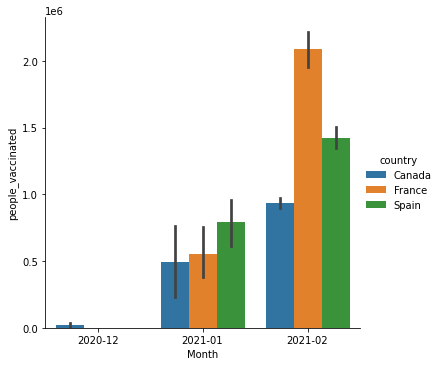

In [121]:
sns.catplot(data=covidthree, kind="bar", x="Month", y='people_vaccinated', hue="country")

In [134]:
%matplotlib inline
plt.monthly(figsize = (100,5))
monthly = sns.catplot(data=covidthree, kind="bar", x="Week", y='people_vaccinated', hue="country")


AttributeError: ignored